In [1]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

### Create a convolution instance

In [3]:
#Create a conv2d class instance with parameters

#parameters
in_chans = 3 #RGB
out_chans = 15
krn_size = 5 #should be a odd number
stride = 1
padding = 0
#create an instance (cf nn.Linear)
c = nn.Conv2d(in_channels=in_chans,out_channels=out_chans, kernel_size=krn_size, stride=stride,padding=padding)

#let's have a look at it
print(c)
print(' ')

#check out it's weight tensor, what are the dimensions?
print("Size of the weights: "+ str(c.weight.shape))
print("Size of bias: ", str(c.bias.shape))

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of the weights: torch.Size([15, 3, 5, 5])
Size of bias:  torch.Size([15])


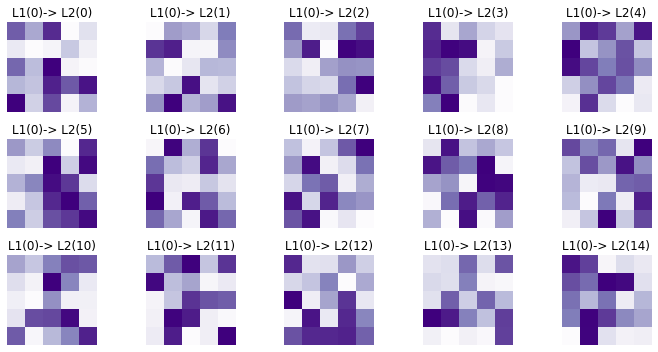

In [9]:
# a look at the kernels

fig,ax = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(ax.flatten()):
    ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
    ax.set_title("L1(0)-> L2(%s)"%i)
    ax.axis('off')
plt.tight_layout()
plt.show()

### Convolve with an image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


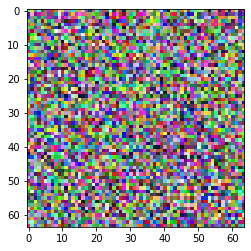

In [11]:
#size of the image (N,RGB, width, height)
imsize = (1,3,64,64)

img = torch.rand(imsize)

#pytorch wants channels first, but matplotlib wants channels last
#therefore, tensors must be permuted to visualzie
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));
plt.show()

In [12]:
#convolve the image with filter banl(set of "outchans) kernels)
convres = c(img)
print(img.shape)
print(convres.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


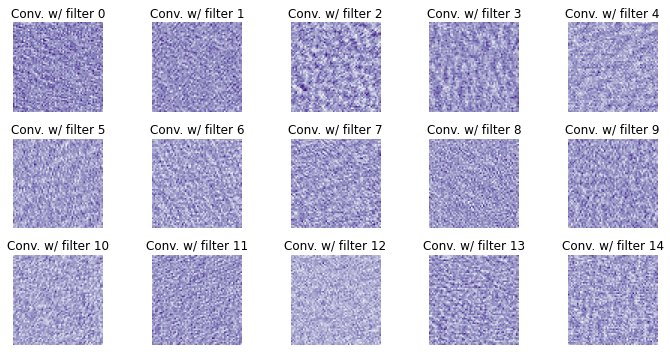

In [15]:
#what do the covolved images look like

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i, ax in enumerate(axs.flatten()):
    #extract this 'layer' of the convolution result
    I = torch.squeeze(convres[0,i,:,:]).detach()

    #and visualize
    ax.imshow(I,cmap='Purples')
    ax.set_title('Conv. w/ filter %s'%i)
    ax.axis('off')

plt.tight_layout()
plt.show()